In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:
X

array([[-0.28276542, -0.91386575, -0.06992782,  1.49923543, -0.80876051],
       [ 1.32919696, -0.79731824,  1.27860332, -1.10560497, -1.98202726],
       [-0.52140321, -0.98282754, -0.65821871, -0.86899654, -1.6851383 ],
       [ 1.61112321,  1.83763211, -1.72111466, -0.4626664 ,  1.76083759],
       [ 0.62178294, -3.37387053, -2.48064522, -0.41627622, -1.28122781],
       [ 1.44810481,  1.45036446, -1.21795483, -1.63414387,  1.81617636],
       [ 0.67158073,  0.44562843,  1.56183994,  2.85155683,  0.14654406],
       [ 0.4309938 , -0.64932645,  0.75568266, -0.10137779, -1.80541431],
       [ 0.69610336, -1.37512858,  0.09597991, -0.15418101, -1.36603005],
       [ 3.34955646, -3.10610307,  1.0868625 ,  2.0657285 , -1.24089302],
       [ 1.63466737, -1.84030874, -0.74354609,  0.73471116,  0.27247507],
       [ 0.57324632,  0.50561161, -1.18011993, -1.30707891,  1.9643933 ],
       [-0.32992015, -0.34223082, -0.78415931,  3.18365311,  0.60699289],
       [ 1.04743367, -0.21939993,  1.0

In [4]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.282765,-0.913866,-0.069928,1.499235,-0.808761,1
1,1.329197,-0.797318,1.278603,-1.105605,-1.982027,1
2,-0.521403,-0.982828,-0.658219,-0.868997,-1.685138,1
3,1.611123,1.837632,-1.721115,-0.462666,1.760838,0
4,0.621783,-3.373871,-2.480645,-0.416276,-1.281228,1


In [5]:
#function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [24]:
#fumction for column sampling
def sample_features(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df= df[cols]
    new_df['target']=df['target']
    return new_df

In [7]:
#function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df=sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [8]:
df.columns.tolist()[:-1]

['col1', 'col2', 'col3', 'col4', 'col5']

In [9]:
df1=sample_rows(df,0.2) #with replacement

In [10]:
sample_rows(df,0.2)

,col1,col2,col3,col4,col5,target
19,3.175695,2.491329,-0.795617,-0.744166,-0.262019,0
70,1.179124,3.216993,5.366716,1.689353,0.679332,1
2,-0.521403,-0.982828,-0.658219,-0.868997,-1.685138,1
72,1.733237,1.199463,-1.057642,-0.484878,0.779472,0
97,0.105427,-1.271138,-0.599842,1.905020,-0.272018,1
16,-2.489054,0.214515,-0.683280,-2.521773,1.067741,0
37,2.245106,1.887911,-1.427832,-0.541110,1.274177,0
35,0.214837,1.229308,-0.403917,-1.806529,-0.176311,0
31,1.422834,0.631141,3.752710,0.628499,-1.183095,1
15,1.698109,2.840348,-1.221679,-1.804505,0.930038,0


In [11]:
df2=sample_rows(df,0.2)

In [12]:
df3=sample_rows(df,0.2)

In [13]:
df1.shape

(20, 6)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [15]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [16]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[4] <= 0.769\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

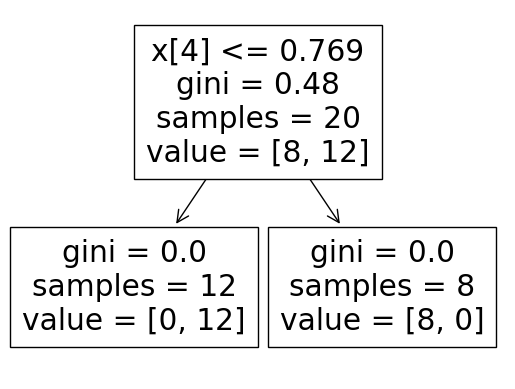

In [17]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[3] <= -0.489\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.4, 0.5, 'x[4] <= -1.205\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

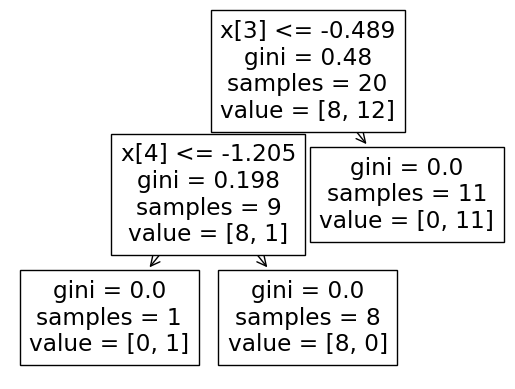

In [18]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.679\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.5, 0.625, 'x[3] <= -0.28\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= -1.344\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

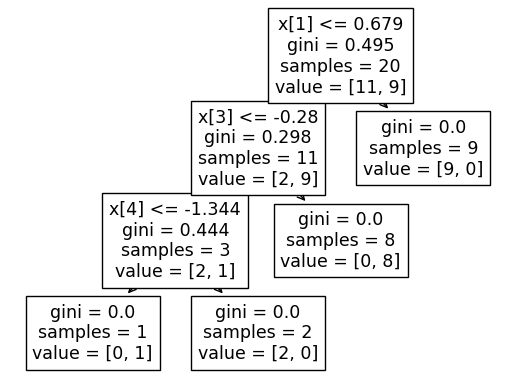

In [19]:
plot_tree(clf3)

In [20]:
clf1.predict(np.array([-3.734992,0.686191,-0.685679,0.309868,2.204754]).reshape(1,5))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
clf2.predict(np.array([-3.734992,0.686191,-0.685679,0.309868,2.204754]).reshape(1,5))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [22]:
clf3.predict(np.array([-3.734992,0.686191,-0.685679,0.309868,2.204754]).reshape(1,5))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
df1=sample_features(df,0.8)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [27]:
df2=sample_features(df,0.8)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [28]:
df3=sample_features(df,0.8)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [34]:
sample_features(df,0.8)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


,col4,col2,col3,col1,target
0,1.499235,-0.913866,-0.069928,-0.282765,1
1,-1.105605,-0.797318,1.278603,1.329197,1
2,-0.868997,-0.982828,-0.658219,-0.521403,1
3,-0.462666,1.837632,-1.721115,1.611123,0
4,-0.416276,-3.373871,-2.480645,0.621783,1
...,...,...,...,...,...
95,-2.096246,-0.131767,-0.618981,-1.125058,0
96,1.832534,-0.757269,2.454071,2.163883,1
97,1.905020,-1.271138,-0.599842,0.105427,1
98,0.724291,-1.485549,2.449453,1.735310,1


In [29]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [30]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [38]:
print("df1 columns:",df1.columns)
print("df2 columns:",df2.columns)
print("df3 columns:",df3.columns)

df1 columns: Index(['col3', 'col5', 'col2', 'col1', 'target'], dtype='object')
df2 columns: Index(['col2', 'col5', 'col4', 'col1', 'target'], dtype='object')
df3 columns: Index(['col4', 'col5', 'col3', 'col2', 'target'], dtype='object')


[Text(0.6071428571428571, 0.9444444444444444, 'x[1] <= 0.684\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[2] <= 1.021\ngini = 0.331\nsamples = 62\nvalue = [13, 49]'),
 Text(0.21428571428571427, 0.7222222222222222, 'x[3] <= -0.778\ngini = 0.204\nsamples = 52\nvalue = [6, 46]'),
 Text(0.14285714285714285, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2857142857142857, 0.6111111111111112, 'x[3] <= 2.687\ngini = 0.115\nsamples = 49\nvalue = [3, 46]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= -0.265\ngini = 0.081\nsamples = 47\nvalue = [2, 45]'),
 Text(0.07142857142857142, 0.3888888888888889, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.21428571428571427, 0.3888888888888889, 'x[1] <= -0.25\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.14285714285714285, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.2777777777777778, 'x[2] <= 0.333\ngini = 0.153\nsamp

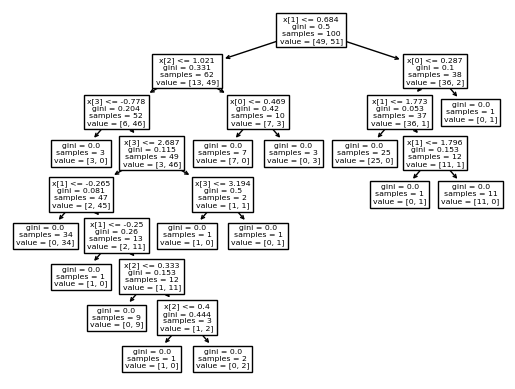

In [31]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[2] <= 0.136\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.25, 0.7, 'x[1] <= -0.821\ngini = 0.303\nsamples = 59\nvalue = [48, 11]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.5, 'x[1] <= 1.773\ngini = 0.04\nsamples = 49\nvalue = [48, 1]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.5, 0.3, 'x[1] <= 1.796\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.75, 0.7, 'x[1] <= 1.801\ngini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

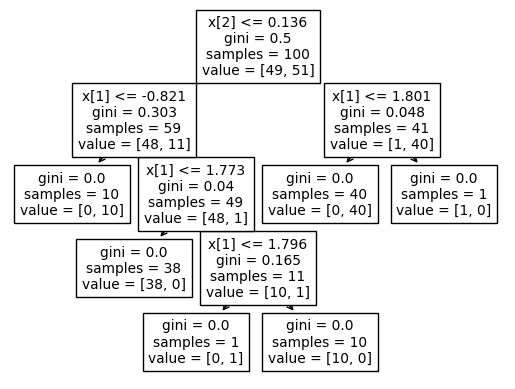

In [32]:
plot_tree(clf2)

[Text(0.5, 0.9, 'x[0] <= 0.136\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.25, 0.7, 'x[1] <= -0.821\ngini = 0.303\nsamples = 59\nvalue = [48, 11]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.5, 'x[1] <= 1.773\ngini = 0.04\nsamples = 49\nvalue = [48, 1]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.5, 0.3, 'x[1] <= 1.796\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.75, 0.7, 'x[1] <= 1.801\ngini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

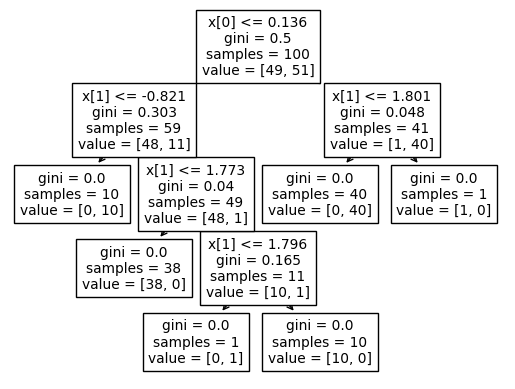

In [33]:
plot_tree(clf3)

In [35]:
clf1.predict(np.array([1.499235,-0.913866,-0.069928,-0.282765]).reshape(1,4))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:
clf2.predict(np.array([1.499235,-0.913866,-0.069928,-0.282765]).reshape(1,4))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
clf3.predict(np.array([1.499235,-0.913866,-0.069928,-0.282765]).reshape(1,4))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
df1=combined_sampling(df,0.5,0.5)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [42]:
df1.shape

(50, 3)

In [43]:
df2=combined_sampling(df,0.5,0.5)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [44]:
df3=combined_sampling(df,0.5,0.5)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [45]:
combined_sampling(df,0.5,0.5)

C:\Users\Riya\AppData\Local\Temp\ipykernel_124\2354944806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


,col4,col3,target
82,-1.527691,-0.884097,0
90,0.403009,-1.298153,1
82,-1.527691,-0.884097,0
46,0.236848,2.314163,1
54,1.453063,-2.342551,1
32,-1.660329,-0.517317,0
50,2.754987,2.650157,1
67,2.234787,0.849356,1
38,-0.666077,-1.902482,0
45,3.659766,2.173774,1


In [46]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [47]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [48]:
print("df1 columns:",df1.columns)
print("df2 columns:",df2.columns)
print("df3 columns:",df3.columns)

df1 columns: Index(['col3', 'col2', 'target'], dtype='object')
df2 columns: Index(['col5', 'col3', 'target'], dtype='object')
df3 columns: Index(['col2', 'col1', 'target'], dtype='object')


[Text(0.5, 0.9166666666666666, 'x[1] <= -0.901\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.25, 0.75, 'x[0] <= -0.455\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.5833333333333334, 'x[0] <= -0.238\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.4166666666666667, 'x[1] <= -2.018\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.375, 0.25, 'x[1] <= -2.306\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.75, 'x[0] <= 0.488\ngini = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(0.625, 0.5833333333333334, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.875, 0.583333333

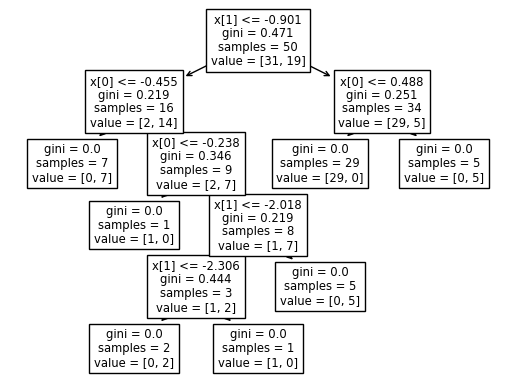

In [49]:
plot_tree(clf1)

[Text(0.2857142857142857, 0.9285714285714286, 'x[0] <= -0.344\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.14285714285714285, 0.7857142857142857, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.42857142857142855, 0.7857142857142857, 'x[1] <= 0.801\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.2857142857142857, 0.6428571428571429, 'x[1] <= -0.594\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.42857142857142855, 0.5, 'x[1] <= -0.549\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.35714285714285715, 'x[0] <= -0.165\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.42857142857142855, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7142857142857143, 0.21428571428571427, 'x[0] <= -0.017\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Te

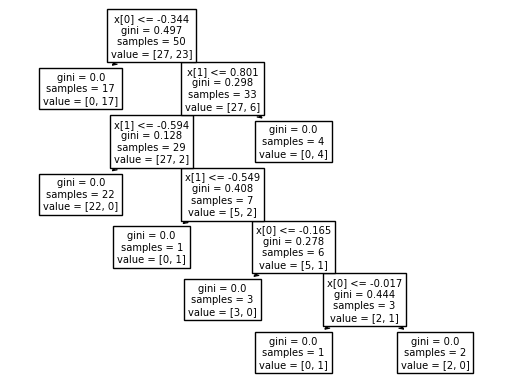

In [50]:
plot_tree(clf2)

[Text(0.38461538461538464, 0.9166666666666666, 'x[0] <= -0.254\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.15384615384615385, 0.75, 'x[1] <= -0.719\ngini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.6153846153846154, 0.75, 'x[0] <= 1.075\ngini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(0.38461538461538464, 0.5833333333333334, 'x[1] <= -0.168\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[0] <= 0.439\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.38461538461538464, 0.25, 'x[0] <= 0.126\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4615384615384

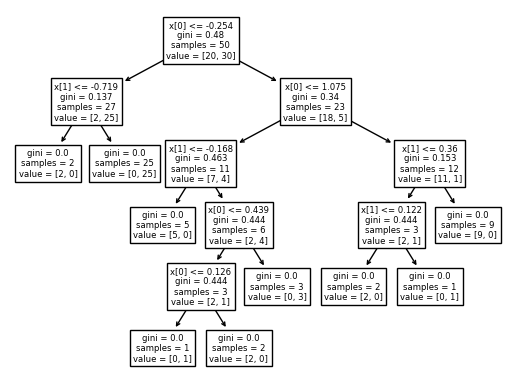

In [51]:
plot_tree(clf3)

In [52]:
clf1.predict(np.array([-0.911357,-0.995852]).reshape(1,2))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [53]:
clf2.predict(np.array([-0.911357,-0.995852]).reshape(1,2))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [54]:
clf3.predict(np.array([-0.911357,-0.995852]).reshape(1,2))

C:\Users\Riya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])